In [1]:
%matplotlib inline
import pathlib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib

In [2]:
# import the columns dframe
df_cols = pd.read_csv('./vidas_data/col_translated_ref.csv')
df_cols

,IT,EN
0,file_name,file_name
1,AMT,AMT
2,API_Version,API_Version
3,AREADIAGNOSTICA,AREADIAGNOSTICS
4,ASL,ASL
...,...,...
2479,vulva,vulva
2480,wHCode,wHCode
2481,wHKey,wHKey
2482,wHRole,wHRole


In [3]:
# import the cross tabulation dframe
df_ref = pd.read_csv('./vidas_data/cross_ref_cols_tabs.csv')
df_ref.head()

,file_name,AMT,API_Version,AREADIAGNOSTICA,ASL,ATCCode,ATCDescription,Abbigliamento,Abitazione,AccessId,...,visioni_morte,visioni_vita,volonta,vomito_occasionale,vomito_persistente,vulva,wHCode,wHKey,wHRole,wHValue
0,wH_Conf_DBType,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,wH_DirectTable_D_Scala_ESAS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,wH_Bck_IsWorking_Bck,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,wH_Core_OperationalUnitAssignation,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,wH_Conf_OuHtmlHeader,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
with pd.option_context("display.max_rows", 1000):
    print(df_ref.loc[:, 'IDEHR'])

0            NaN
1            NaN
2            NaN
3            NaN
4            NaN
5            NaN
6            NaN
7            NaN
8            NaN
9            NaN
10           NaN
11           NaN
12           NaN
13       10749.0
14           NaN
15           NaN
16           NaN
17         253.0
18           NaN
19      644350.0
20           NaN
21          12.0
22       14493.0
23           NaN
24           NaN
25           NaN
26      243019.0
27           1.0
28           NaN
29           NaN
30           NaN
31         387.0
32           NaN
33       10217.0
34           NaN
35           NaN
36           NaN
37       11068.0
38           NaN
39           NaN
40          48.0
41           NaN
42           NaN
43           NaN
44        4025.0
45           1.0
46        3650.0
47           NaN
48           NaN
49           NaN
50           NaN
51           7.0
52           NaN
53           NaN
54           NaN
55           NaN
56           NaN
57           NaN
58           N

In [5]:
# Reference function 1
# get_file_names(col_names, df_ref)
#
# Purpose: Returns the file names of all tables containing all of the columns specified in col_names using df_ref
# 
# Input: col_names: List containing desired column names
#        df_ref: Reference dframe (cross_ref_cols_tabs.csv)
#
# Returns: List of file names containing all of the col_names

def get_file_names(col_names, df_ref):
    file_names = []
    # get list of files where the col has at least 1 entry
    for col in col_names:
        file_names.append(df_ref.iloc[df_ref.loc[:, col].dropna().index,0].tolist())
    # get the intersection of file_names for all cols
    file_names = list(set.intersection(*map(set, file_names)))
    return file_names

In [6]:
# test get_file_names()
print(get_file_names(['IDEHR', 'chk_stato_danimo'], df_ref))

['wH_DirectTable_C_VISITA_MED_VIDAS', 'wH_DirectTable_VISITA_MED_VIDAS']


In [7]:
df_obs = pd.read_csv('./vidas_data/wH_DirectTable_VISITA_OSS_VIDAS.csv')[['IDEHR', 'stato_danimo']]

C:\Users\prate\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (21,22,26,27,28,31,48,51,58,72,82,83,90,93,98,99,116,122) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [8]:
# Reference function 2
# get_histplot(col_names, df_ref, labels)
#
# Purpose: Returns a histogram of value_counts of column specified in col_name present in df_ref using IDEHR as the counter
# 
# Input: col_name: Column name
#        df_ref: Data
#        label: Column label
#
# Returns: Histplot of the value_counts of the columns

def get_histplot(col_name, df_ref, label):
    print('No. of unique IDEHR: ', len(df_ref[['IDEHR', col_name]].dropna().IDEHR.unique()))
    plt.rcParams['figure.figsize'] = [15, 8]
    matplotlib.rcParams.update({'font.size': 15})
    plt.figure()
    fig, ax = plt.subplots()
    ax = sns.histplot(data=df_ref[['IDEHR', col_name]].dropna().IDEHR.value_counts())
    ax.set_title(label)
    ax.set_xlabel('No. of observations')
    ax.set_ylabel('No. of IDEHRs')
    plt.grid()
    plt.show()

No. of unique IDEHR:  2795


<Figure size 1080x576 with 0 Axes>

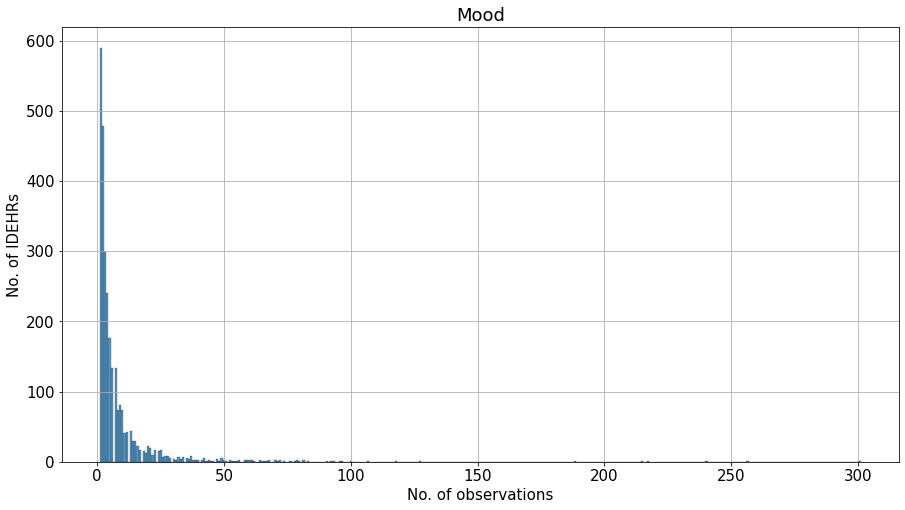

In [9]:
get_histplot('stato_danimo', df_obs, 'Mood')

In [10]:
df_obs[['IDEHR', 'stato_danimo']].dropna().IDEHR.value_counts()

11941    301
1362     256
1804     240
15271    217
4893     215
        ... 
3624       1
3640       1
29133      1
20080      1
26885      1
Name: IDEHR, Length: 2795, dtype: int64

In [11]:
# Reference function 3
# get_scatter_marker_size(col_array)
#
# Purpose: Returns a resized scatter marker array given an array of data scaled in the range [min_size, max_size]
# 
# Input: col_array: an array of data points
#        min_size: desired area of the smallest point
#        max_size: desired area of the largest point
#
# Returns: Array of marker sizes to be passed as the 's' argument to plt.scatter()

def get_scatter_marker_size(col_array, min_size=10, max_size=1000):
    c_min = np.min(col_array)
    c_max = np.max(col_array)
    return [((i - c_min) * (max_size - min_size) / (c_max - c_min)) + min_size for i in col_array]

In [12]:
t_arr = np.array([1, 2, 3, 10, 50, 43, 400, 23, 56, 100])
print(get_scatter_marker_size(t_arr, 50, 500))

[50.0, 51.12781954887218, 52.255639097744364, 60.150375939849624, 105.26315789473685, 97.36842105263159, 500.0, 74.81203007518798, 112.03007518796993, 161.65413533834587]


In [13]:
# get the co-effs of best fit for first and second order poly for a heatmap
# Reference function 4
# get_coeffs(dframe, n)
#
# Purpose: Returns the co-effs of best fit for first and second order poly for a heatmap data frame having n hos_weeks (or similar time unit along x)
# 
# Input: dframe: a data frame of the heatmap data
#        n: no. of hos_week (or similar time unit along x)
#
# Returns: Data frame appended to heatmap data with co-effs (m, x2, x1)
def get_coeffs(df_hm, n):
    # correct way
    dft = df_hm.apply(lambda x: np.polyfit(y=x, x=np.linspace(0, n, n+1), deg=1), axis=1)
    dft = dft.to_frame().rename(columns={0: 'deg1 (m)'})
    dft['deg1 (m)'] = dft['deg1 (m)'].apply(lambda x: np.nan if isinstance(x, float) else np.round(x[0], 2))
    dft_2 = df_hm.apply(lambda x: np.polyfit(y=x, x=np.linspace(0, n, n+1), deg=2), axis=1).to_frame().rename(columns={0: 'deg2'})
    dft_2 = dft_2['deg2'].apply(lambda x: np.nan if isinstance(x, float) else x[0:2])
    dft_2 = pd.DataFrame(dft_2.to_list(), columns=['deg2 (x2)', 'deg2 (x1)'], index=dft_2.index)
    dft = pd.concat([dft, dft_2], axis=1)
    dft['deg2 (x2)'] = dft['deg2 (x2)'].apply(lambda x: np.round(x, 2))
    dft['deg2 (x1)'] = dft['deg2 (x1)'].apply(lambda x: np.round(x, 2))
    return pd.concat([df_hm, dft], axis=1)  